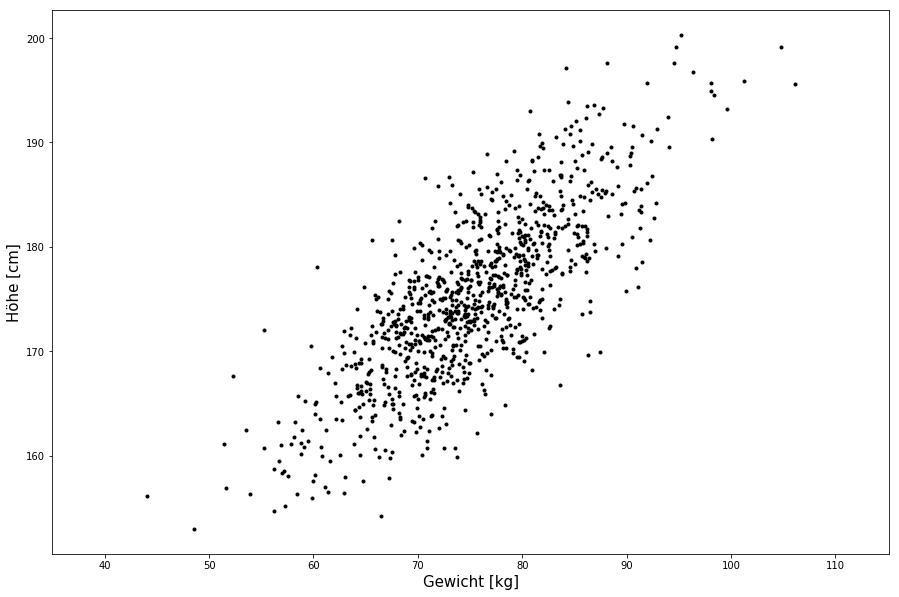

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

y = np.array([150, 200])
x = np.array([50, 100])
means = [x.mean(), y.mean()]  
stds = [x.std() / 3, y.std() / 3]
corr = 0.8
covs = [[stds[0]**2          , stds[0]*stds[1]*corr], 
        [stds[0]*stds[1]*corr,           stds[1]**2]] 

X = np.random.multivariate_normal(means, covs, 1000)
plt.figure(figsize = (15,10))
plt.ylabel('Höhe [cm]', fontsize = 15)
plt.xlabel('Gewicht [kg]', fontsize = 15)
plt.axis('equal')
plt.plot(X[:,0],X[:,1],'k.')

In [5]:
pd.DataFrame(X, columns = ['Gewicht', 'Höhe']).head()

,Gewicht,Höhe
0,75.917298,178.331838
1,104.760824,199.151798
2,68.549621,174.062668
3,65.389499,166.879836
4,73.511343,172.321883


In [6]:
from sklearn.decomposition import PCA

Y = X - X.mean(axis = 0)
pca = PCA()
pca.fit(Y)
transformed_data = pca.transform(Y)
pca_df = pd.DataFrame(transformed_data, columns=['PC1','PC2'])

In [39]:
plt.figure(figsize = (10,10))
plt.ylabel('Höhe [cm]', fontsize = 14)
plt.xlabel('Gewicht [kg]', fontsize = 14)
plt.plot(Y[:,0] + means[0],Y[:,1] + means[1],'k.')
plt.axis('equal')
marker = 200
lambda_1 = pca.explained_variance_[0]/3.5
lambda_2 = pca.explained_variance_[1]/1.5
#plt.plot(Y[marker,0],Y[marker,1],'y.', markersize = 20)
plt.plot([-lambda_1*pca.components_[0,0] + means[0],lambda_1*pca.components_[0,0] + means[0]],[-lambda_1*pca.components_[0,1] + means[1],lambda_1*pca.components_[0,1] + means[1]],'r', linewidth = 2)
plt.plot([-lambda_2*pca.components_[1,0] + means[0],lambda_2*pca.components_[1,0] + means[0]],[-lambda_2*pca.components_[1,1] + means[1],lambda_2*pca.components_[1,1] + means[1]],'r', linewidth = 2)

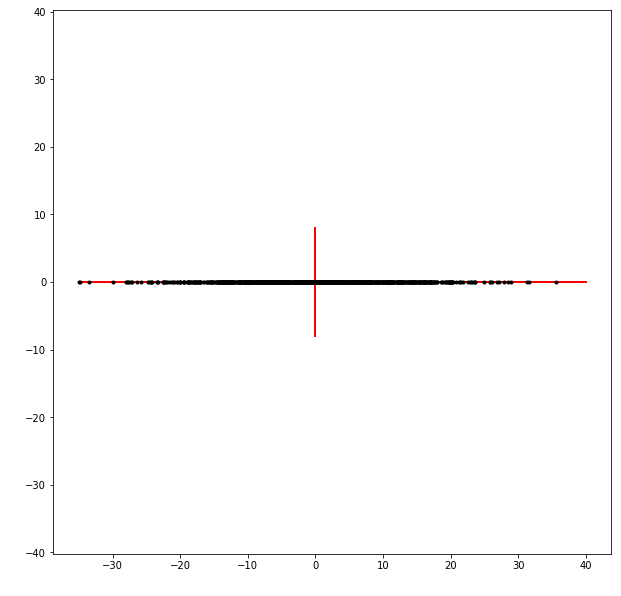

In [6]:
w_1 = Y.dot(pca.components_[0])
w_2 = Y.dot(pca.components_[1])
plt.figure(figsize = (10,10))
plt.plot([-35,40],[0,0],'r', linewidth = 2)
plt.plot([0,0],[-8,8],'r', linewidth = 2)
plt.axis('equal')
plt.ylabel(' ', fontsize = 14)
plt.xlabel(' ', fontsize = 14)
plt.plot(w_1,np.zeros(1000),'k.')
#plt.plot(w_1[marker],0,'y.', markersize = 20)

In [63]:
V = pca.components_
proj_operator = np.array([[V[0,0]**2, V[0,0]*V[0,1]],
                 [V[0,1]*V[0,0], V[0,1]**2]])
proj_data = proj_operator.dot(Y.T).T
proj_df = pd.DataFrame(proj_data, columns = ['PROJ_1', 'PROJ_2'])

In [64]:

plt.figure(figsize = (15,10))
plt.ylabel('Höhe')
plt.xlabel('Gewicht')
plt.plot(proj_df['PROJ_1'],proj_df['PROJ_2'],'k.')
plt.axis('equal')
marker = 200
plt.plot(proj_df.loc[marker,'PROJ_1'],proj_df.loc[marker,'PROJ_2'],'y.', markersize = 20)
plt.plot([-lambda_1*pca.components_[0,0],lambda_1*pca.components_[0,0]],[-lambda_1*pca.components_[0,1],lambda_1*pca.components_[0,1]],'r')
plt.plot([-lambda_2*pca.components_[1,0],lambda_2*pca.components_[1,0]],[-lambda_2*pca.components_[1,1],lambda_2*pca.components_[1,1]],'r')

In [19]:
# Reconstruction Rank 1
rank_1 = [[z[0] * pca.components_[0,0], z[0] * pca.components_[0,1]] for z in transformed_data]

In [22]:
rank_1 = np.array(rank_1)

(-27.761428019628447,
 27.330197436496412,
 -27.65053756035013,
 27.221029487939965)

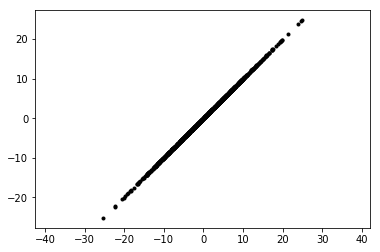

In [24]:
plt.plot(rank_1[:,0], rank_1[:,1],'k.')
plt.axis('equal')

In [62]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

%matplotlib qt

fig, ax = plt.subplots(figsize = (10,10))
lambda_1 = pca.explained_variance_[0]/3.5
lambda_2 = pca.explained_variance_[1]/1.5
x = [-lambda_1*pca.components_[0,0] + means[0],lambda_1*pca.components_[0,0] + means[0]]
y = [-lambda_1*pca.components_[0,1] + means[1],lambda_1*pca.components_[0,1] + means[1]]
start_point = [(x[0]+x[1])/2, (y[0]+y[1])/2]
line, = plt.plot(x, y,'r')

def get_point(point, angle, length):
    # unpack the first point
    x = point[0]
    y = point[1]

    # find the end point
    endx = length * np.cos(np.radians(angle))
    endy = length * np.sin(np.radians(angle))

    return [x + endx, y + endy]

def get_line(p1, p2, parts):
    x = np.linspace(p1[0],p2[0],parts+1)
    y = np.linspace(p1[1],p2[1],parts+1)
    return x,y

def init():  # only required for blitting to give a clean slate.
    angle = 0
    plt.ylabel('Height [cm]', fontsize = 14)
    plt.xlabel('Weight [kg]', fontsize = 14)
    plt.plot(Y[:,0] + means[0],Y[:,1] + means[1],'k.')
    plt.axis('equal')
    x,y = get_line(start_point, get_point(start_point,angle,lambda_1),1000)
    x_neg, y_neg = get_line(start_point, get_point(start_point,angle,lambda_1),1000)
    x = np.concatenate((x,x_neg))
    y = np.concatenate((y,y_neg))
    line.set_data(x, y)
    return line,


def animate(i):
    x,y = get_line(start_point, get_point(start_point,i,lambda_1),1000)
    x_neg, y_neg = get_line(start_point, get_point(start_point,i+180,lambda_1),1000)
    x = np.concatenate((x,x_neg))
    y = np.concatenate((y,y_neg))
    line.set_data(x, y)
    return line,

ani = animation.FuncAnimation(
    fig, animate, init_func=init, interval=20, blit=True, save_count=50)

plt.show()

In [66]:
for point in X:
    print(np.dot(point[0], point[1]) / np.linalg.norm(point[1]))

[ 75.91729799 178.33183757]
[104.76082425 199.15179784]
[ 68.54962115 174.06266787]
[ 65.3894994  166.87983615]
[ 73.51134322 172.32188338]
[ 72.00492755 179.57010142]
[ 70.78547818 167.51668612]
[ 66.79190325 171.74678683]
[ 73.81889607 174.41974725]
[ 86.3043367 189.0621517]
[ 81.46692766 179.25466603]
[ 78.42888025 174.83237062]
[ 82.70136533 176.33785746]
[ 53.57976884 162.49772466]
[ 73.55624975 183.33647585]
[ 74.52999832 173.92575052]
[ 75.38254802 173.06763777]
[ 69.73926187 177.54353446]
[ 74.98974769 172.84181298]
[ 68.9946511 168.5075742]
[ 65.64346938 163.69677829]
[ 81.54787261 183.67874447]
[ 60.17304666 164.93458427]
[ 80.59985085 186.27070152]
[ 44.0113039  156.09893228]
[ 75.94537332 170.52528394]
[ 66.96735896 167.99585725]
[ 75.69234566 173.18191199]
[ 70.91706937 171.02995834]
[101.27046925 195.87371562]
[ 48.5963186  152.95497564]
[ 92.85861268 184.22677113]
[ 75.5317022  179.73143651]
[ 83.08390925 174.07724158]
[ 71.02581389 174.46226446]
[ 85.76793931 188.845379

array([[ 0.7549336 ,  3.1369881 ],
       [29.59845986, 23.95694837],
       [-6.61274323, -1.13218159],
       ...,
       [ 3.24081586, 13.00156076],
       [10.72173253, 12.17025748],
       [ 1.26033613,  7.98015477]])